# Customer Segmentation Analysis

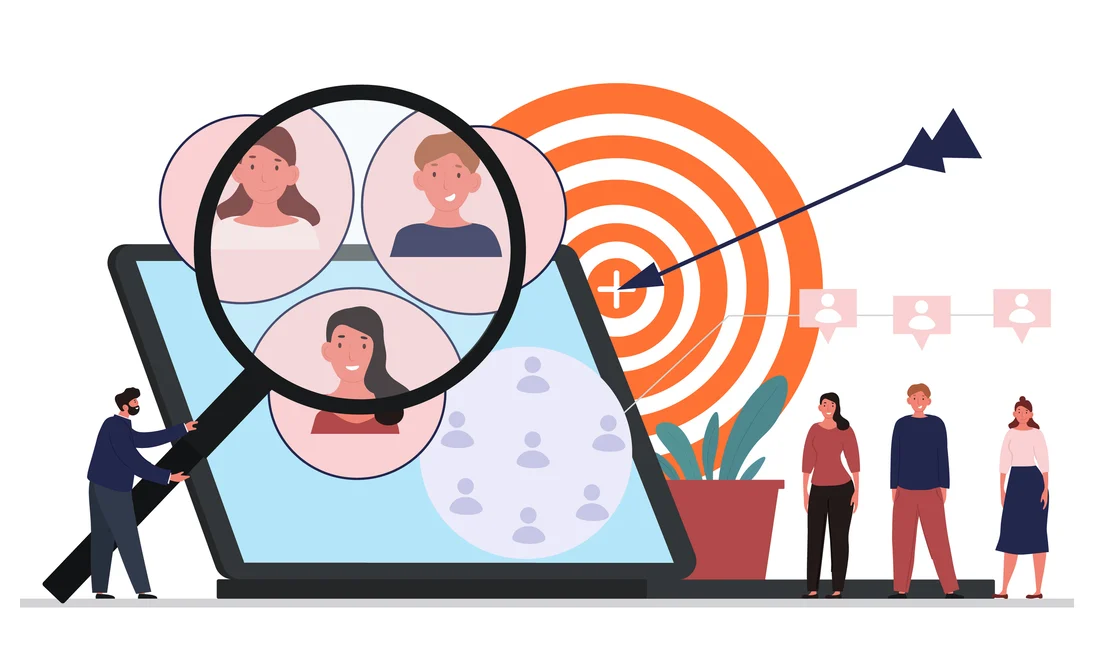

**Dataset used:**

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data


In [60]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

# Set display options to fit all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Do not limit the width
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping

# suppress warnings
import warnings
warnings.filterwarnings("ignore")


In [61]:
 data = pd.read_csv("/content/marketing_campaign.csv",sep="\t")
 data.head()




ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0  5524        1957  Graduation         Single  58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1
1  2174        1954  Graduation         Single  46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0              3         11         0
2  4141        1965  Graduation       Together  71613.0        0         0  21-08-2013       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0              3         11         0
3  6182        1984  Graduation       Together  26646.0        1         0  10-02-2014       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0              3         11         0
4  5324        1981         PhD        Married  58293.0        1         0  19-01-2014       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0              3         11         0

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [63]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [64]:
#FILL THE MISSING VALUES WITH THE MEDIAN VALUES..
data['Income']=data['Income'].fillna(data['Income'].median())

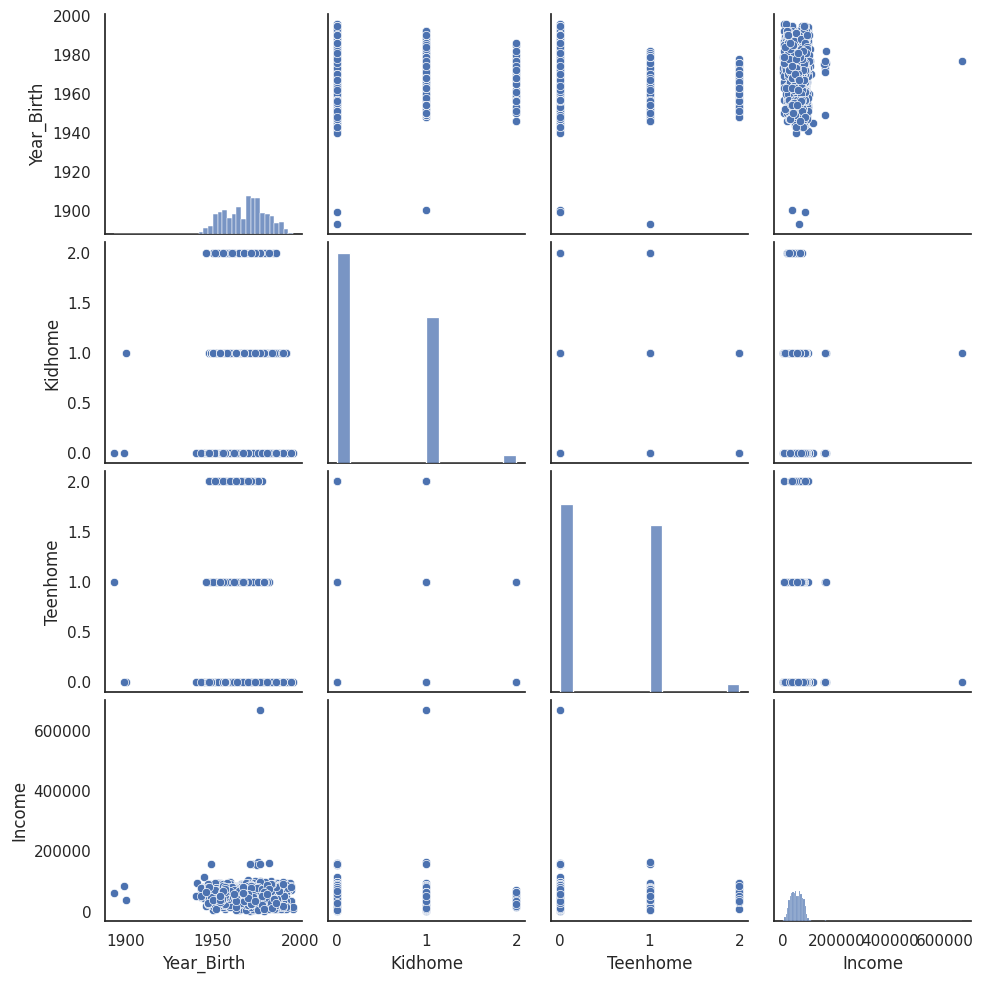

In [65]:
outliers = ["Year_Birth","Kidhome","Teenhome","Income"]

sns.pairplot(data[outliers],palette= (["#682F2F","#F3AB60"]))


In [66]:
data = data[(data["Year_Birth"]>1920)]
data = data[(data["Income"]<600000)]

In [67]:
data=data.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

In [68]:
# Convert 'Dt_Customer' to datetime format with dayfirst=True
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)



Unique values in column 'Education': ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in column 'Marital_Status': ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


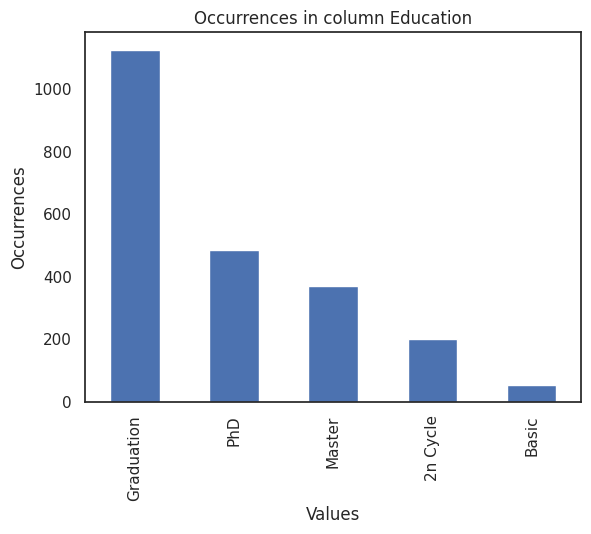

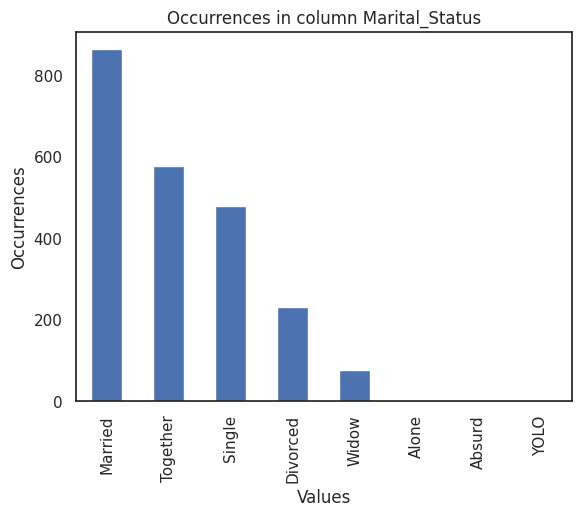

In [69]:
# Check for unique values and frequency in cat_cols
object_col_names=data.select_dtypes(include="object").columns

for col in object_col_names:
    unique=data[col].unique()
    print(f"Unique values in column '{col}': {unique}")

for col in object_col_names:
    count=data[col].value_counts()
    count.plot(kind='bar', title=f'Occurrences in column {col}')
    plt.xlabel('Values')
    plt.ylabel('Occurrences')
    plt.show()

In [70]:
#CHANGING CATEGORY INTO "UG" AND "PG" ONLY....
data['Education'] = data['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')
data['Education'] = data['Education'].replace(['Basic'], 'Under Graduate')

In [71]:
#REPLACING THE CONFLICT VALUES IN Marital_status..
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'Relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [72]:
# Combining different dataframe into a single column to reduce the number of dimension

data['Kids'] = data['Kidhome'] + data['Teenhome']

In [73]:
# Combining different dataframe into a single column to reduce the number of dimension

data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

In [74]:
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']+data['Response']

In [75]:
data['NumTotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']
data['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44])

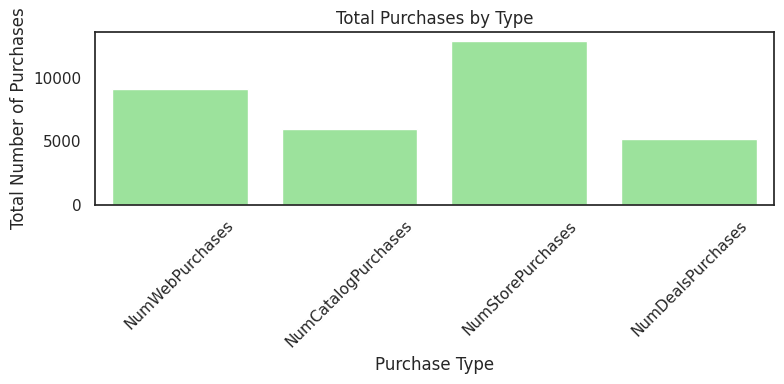

In [76]:

# Purchase Places
# ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Sum up each purchase type
totals = {
    'Purchase Type': ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', ],
    'Total Purchases': [
        data['NumWebPurchases'].sum(),
        data['NumCatalogPurchases'].sum(),
        data['NumStorePurchases'].sum(),
        data['NumDealsPurchases'].sum()
    ]
}

# Create a DataFrame
df_totals = pd.DataFrame(totals)

# bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='Purchase Type', y='Total Purchases', data=df_totals, color='lightgreen')
plt.title('Total Purchases by Type')
plt.xlabel('Purchase Type')
plt.ylabel('Total Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# \Among all consumers, the most common type of purchase is in-store.

In [77]:
#                           ## **Analyzing Purchasing Behavior & Product Preferences:**##


# # Calculating mean spending for family and single groups
# mean_spending = data.groupby('Living_situation')['Total_spending'].mean()

# print("Mean Total Spending Comparision:")
# print(mean_spending)
# print('')

# # Calculating mean purchases for wines and fruits for family and single groups
# mean_wines = df.groupby('Living_situation')['Wines'].mean()
# mean_fruits = df.groupby('Living_situation')['Fruits'].mean()
# mean_meat= df.groupby('Living_situation')['Meat'].mean()
# mean_fish=df.groupby('Living_situation')['Fish'].mean()
# mean_gold=df.groupby('Living_situation')['Gold'].mean()
# mean_sweets=df.groupby('Living_situation')['Sweets'].mean()

# print("Mean Wines Purchases:")
# print(mean_wines)
# print("\nMean Fruits Purchases:")
# print(mean_fruits)
# print("\nMean Meat Purchases:")
# print(mean_meat)
# print("\nMean Fish Purchases:")
# print(mean_fish)
# print("\nMean Gold Purchases:")
# print(mean_gold)
# print("\nMean Sweets Purchases:")
# print(mean_sweets)


# # Plotting
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))

# # Mean Total Spending comparison
# axes[0, 0].bar(mean_spending.index, mean_spending.values, color=['blue', 'green'])
# axes[0, 0].set_title('Mean Total Spending Comparison')
# axes[0, 0].set_xlabel('Living Situation')
# axes[0, 0].set_ylabel('Mean Total Spending')

# # Mean Purchases of Wines
# axes[0, 1].bar(mean_wines.index, mean_wines.values, color=['blue', 'green'])
# axes[0, 1].set_title('Mean Wines Purchases')
# axes[0, 1].set_xlabel('Living Situation')
# axes[0, 1].set_ylabel('Mean Wines Purchases')

# # Mean Purchases of Fruits
# axes[0, 2].bar(mean_fruits.index, mean_fruits.values, color=['blue', 'green'])
# axes[0, 2].set_title('Mean Fruits Purchases')
# axes[0, 2].set_xlabel('Living Situation')
# axes[0, 2].set_ylabel('Mean Fruits Purchases')

# # Mean Purchases of Meat
# axes[1, 0].bar(mean_meat.index, mean_meat.values, color=['blue', 'green'])
# axes[1, 0].set_title('Mean Meat Purchases')
# axes[1, 0].set_xlabel('Living Situation')
# axes[1, 0].set_ylabel('Mean Meat Purchases')

# # Mean Purchases of Fish
# axes[1, 1].bar(mean_fish.index, mean_fish.values, color=['blue', 'green'])
# axes[1, 1].set_title('Mean Fish Purchases')
# axes[1, 1].set_xlabel('Living Situation')
# axes[1, 1].set_ylabel('Mean Fish Purchases')

# # Mean Purchases of Gold
# axes[1, 2].bar(mean_gold.index, mean_gold.values, color=['blue', 'green'])
# axes[1, 2].set_title('Mean Gold Purchases')
# axes[1, 2].set_xlabel('Living Situation')
# axes[1, 2].set_ylabel('Mean Gold Purchases')

# # Adjust layout
# plt.tight_layout()

# # Display plot
# plt.show()


In [78]:
#ADDING A COLUMN "customer_Age" IN THE DATAFRAME....
data['Customer_Age'] = (pd.Timestamp('now').year) - data['Year_Birth']
data.head()

ID  Year_Birth      Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Kids  Expenses  TotalAcceptedCmp  NumTotalPurchases  Customer_Age
0  5524        1957  Post Graduate         Single  58138.0        0         0  2012-09-04       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1     0      1617                 1                 25            67
1  2174        1954  Post Graduate         Single  46344.0        1         1  2014-03-08       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0     2        27                 0                  6            70
2  4141        1965  Post Graduate   Relationship  71613.0        0         0  2013-08-21       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0     0       776                 0                 21            59
3  6182        1984  Post Graduate   Relationship  26646.0        1         0  2014-02-10       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0     1        53                 0                  8            40
4  5324        1981  Post Graduate   Relationship  58293.0        1         0  2014-01-19       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0     1       422                 0                 19            43

In [79]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["Year_Birth","ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
data=data.drop(columns=col_del,axis=1)

<Axes: title={'center': 'Correlation Heatmap'}>

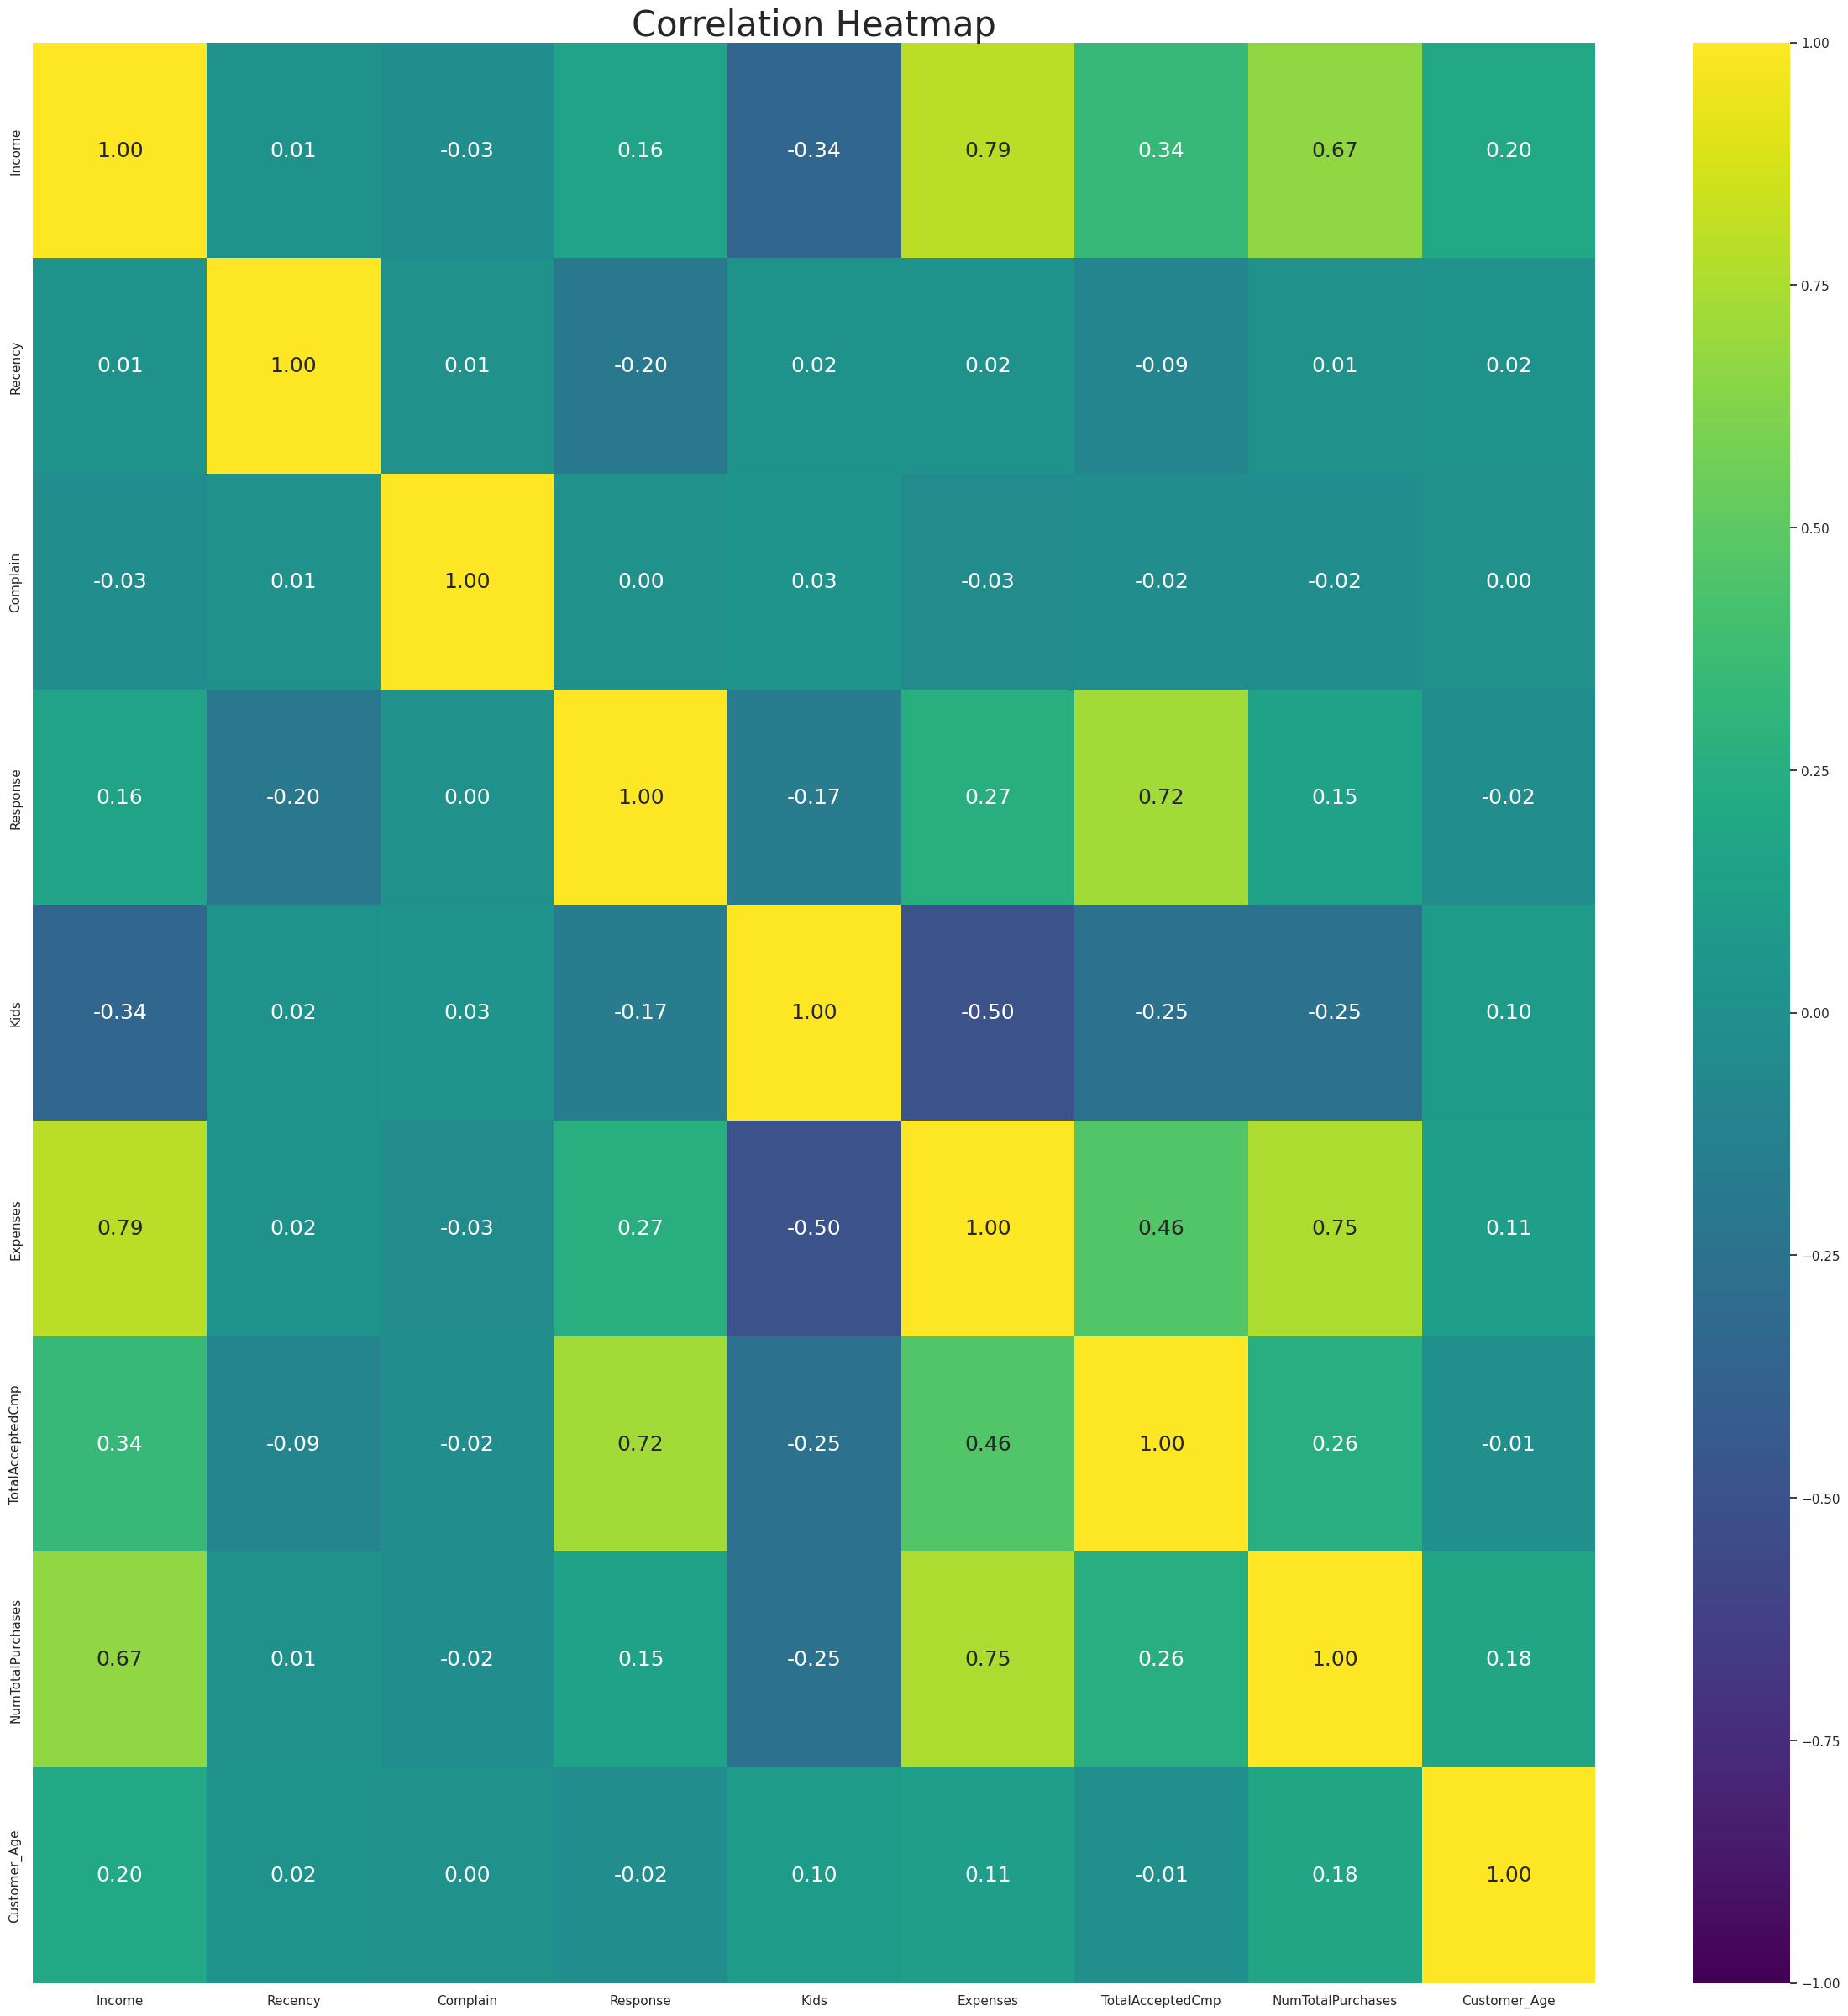

In [80]:
# Plotting heatmap of correlations
cols= data.select_dtypes(include="number")
correlation_matrix = cols.corr()
plt.figure(figsize=(30,30))
plt.title('Correlation Heatmap', fontsize=30)
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", vmin=-1, vmax=1, center=0,annot_kws={"size": 18})

# Correlation Coefficients:
  # Values close to 1 or -1 indicate strong positive or negative correlations respectively,
  # while values close to 0 indicate weak or no correlation.

In [81]:
## **Interpretation of Correlations**
# print('Interpretation of Correlations:')
# for col in corr_matrix.columns:
#     print(f"Feature '{col}' has the following correlations:")
#     for index, value in corr_matrix[col].items():
#         if index != col:  # Exclude self-correlation (which is always 1.0)
#             print(f"  - Correlation with '{index}': {value:.2f}")
#             if value > 0:
#                 print(f"    -> A positive correlation: As '{col}' increases, '{index}' also tends to increase.")
#             elif value < 0:
#                 print(f"    -> A negative correlation: As '{col}' increases, '{index}' tends to decrease.")
#             else:
#                 print(f"    -> No correlation between '{col}' and '{index}'.")
#     print()


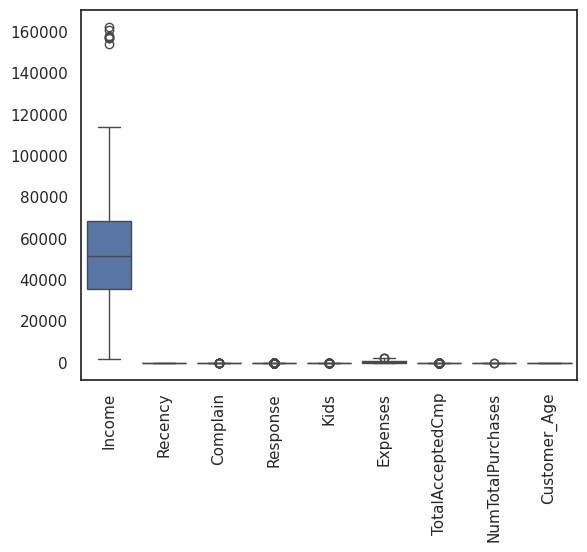

In [82]:
# Outliers
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Education          2236 non-null   object        
 1   Marital_Status     2236 non-null   object        
 2   Income             2236 non-null   float64       
 3   Dt_Customer        2236 non-null   datetime64[ns]
 4   Recency            2236 non-null   int64         
 5   Complain           2236 non-null   int64         
 6   Response           2236 non-null   int64         
 7   Kids               2236 non-null   int64         
 8   Expenses           2236 non-null   int64         
 9   TotalAcceptedCmp   2236 non-null   int64         
 10  NumTotalPurchases  2236 non-null   int64         
 11  Customer_Age       2236 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 227.1+ KB


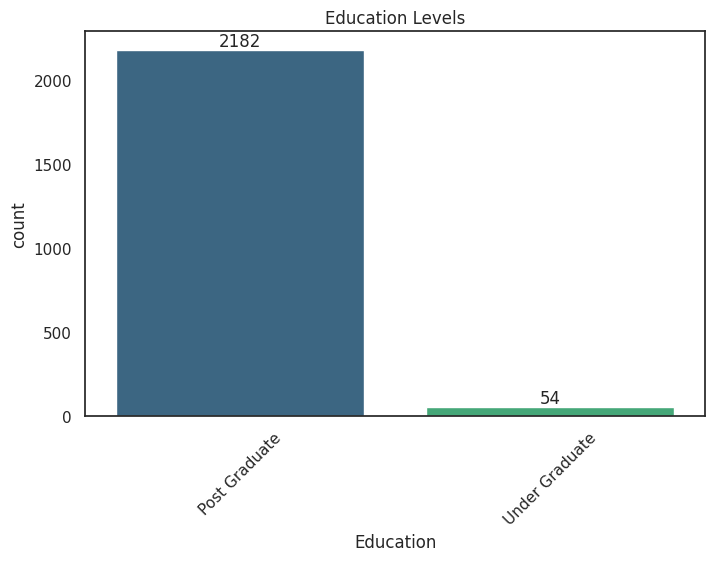

In [84]:
# Bar plot for Education
plt.figure(figsize=(8, 5))
figure = sns.countplot(x='Education', data=data, palette='viridis')
for contain in figure.containers :
    figure.bar_label(contain)
plt.title('Education Levels')
plt.xticks(rotation=45)
plt.show()


In [85]:
# Education
data_edu= pd.DataFrame(data.Education.value_counts())

# Calculate total count
total_count = data_edu['count'].sum()

# Calculate percentages
data_edu['Percentage'] = (data_edu['count'] / total_count) * 100
print(data_edu)


                count  Percentage
Education                        
Post Graduate    2182   97.584973
Under Graduate     54    2.415027


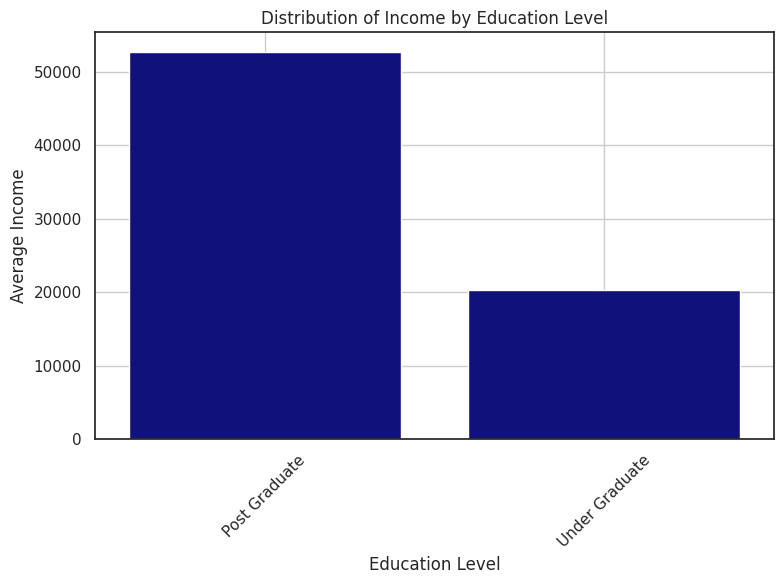

In [86]:
# Analysing Income Distribution with regard Education
# Use the original dataframe here, assuming it was named 'df'
income_by_education = pd.DataFrame(data.groupby("Education")["Income"].mean()).round(2)

# Bar chart
plt.figure(figsize=(8, 6))
plt.title("Distribution of Income by Education Level")
# Use the new DataFrame that contains the average income by education
sns.barplot(x=income_by_education.index, y='Income', data=income_by_education, errorbar=None, color='darkblue')
plt.xlabel("Education Level")
plt.ylabel("Average Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

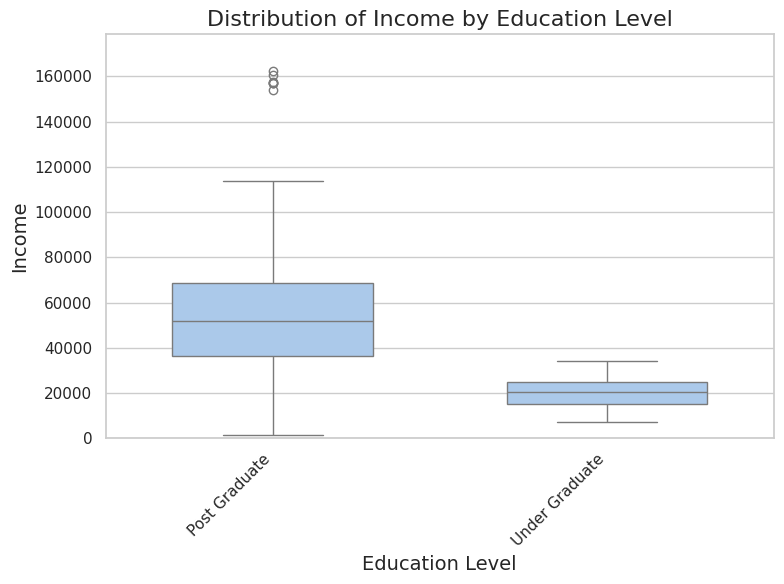

In [87]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid", palette="pastel")

# Boxplot
sns.boxplot(x=data['Education'], y=data['Income'], width=0.6)

# Customize labels and title
plt.title('Distribution of Income by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Income', fontsize=14)

# Rotate x-axis labels for better readability & presentation
plt.xticks(rotation=45, ha='right')
plt.ylim(0, data['Income'].max() * 1.1)

plt.tight_layout()
plt.show()


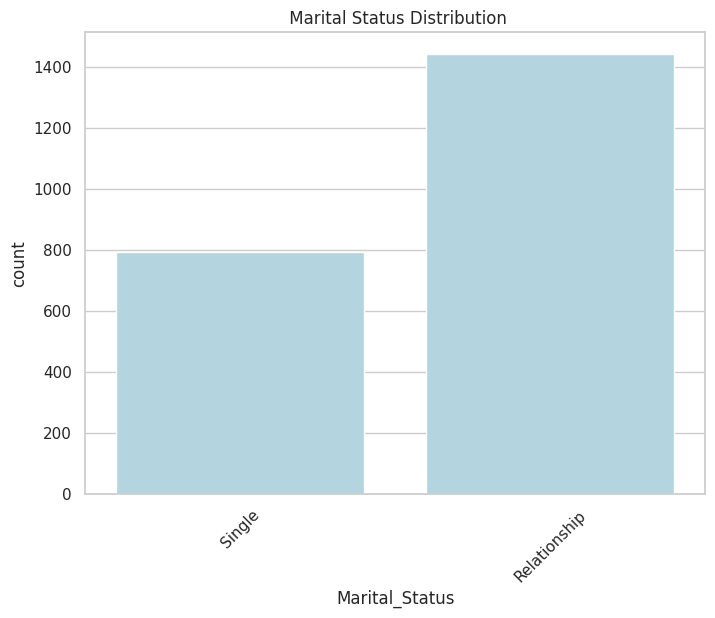

In [88]:


# Bar plot for Marital Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', data=data, color= 'lightblue')
plt.title(' Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()

# There are around 1400+ families. And almost 800 single people.
#

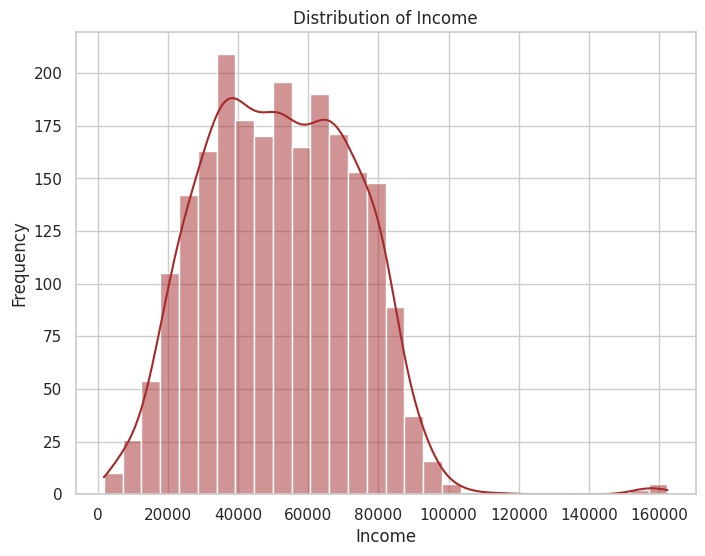

In [89]:
#  Distribution of Income
plt.figure(figsize=(8, 6))
sns.histplot(data['Income'], kde=True, bins=30, color= 'brown')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()



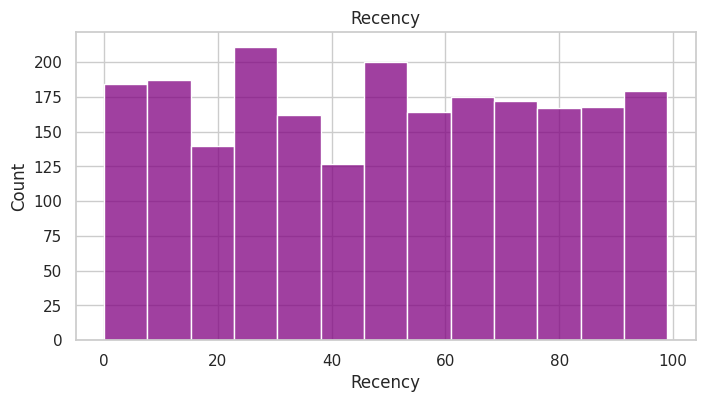

In [90]:
## Histogram for Recency
plt.figure(figsize=(8, 4))
sns.histplot(data.Recency,color='purple')
plt.title('Recency')
plt.show()

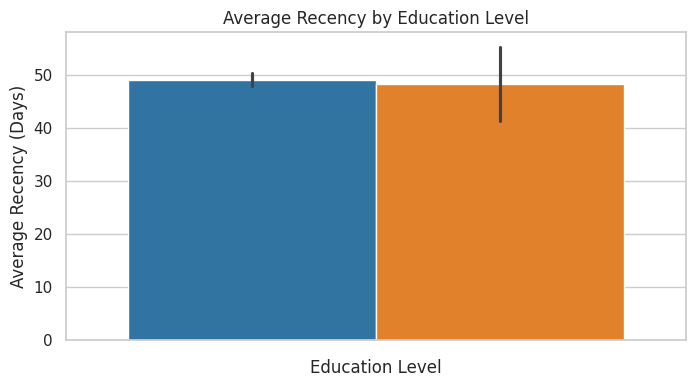

In [91]:
# Bar Char of Average Recency by Education Level
plt.figure(figsize=(8, 4))
sns.barplot(hue='Education', y='Recency', legend=False,  data=data ,palette="tab10")

plt.xlabel("Education Level")
plt.ylabel("Average Recency (Days)")
plt.title("Average Recency by Education Level")

plt.show()

In [92]:
# After converting 'Dt_Customer' to datetime format (already done above)
# Extract dates and find the newest and oldest customer enrollment dates
dates = data["Dt_Customer"].dt.date
print("The newest customer's enrolment date in the records:", max(dates))
print("The oldest customer's enrolment date in the records:", min(dates))


The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [93]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data['Customer_For'] = data['Customer_For'].apply(lambda x:x.days)

In [94]:
data.head()

Education Marital_Status   Income Dt_Customer  Recency  Complain  Response  Kids  Expenses  TotalAcceptedCmp  NumTotalPurchases  Customer_Age  Customer_For
0  Post Graduate         Single  58138.0  2012-09-04       58         0         1     0      1617                 1                 25            67           663
1  Post Graduate         Single  46344.0  2014-03-08       38         0         0     2        27                 0                  6            70           113
2  Post Graduate   Relationship  71613.0  2013-08-21       26         0         0     0       776                 0                 21            59           312
3  Post Graduate   Relationship  26646.0  2014-02-10       26         0         0     1        53                 0                  8            40           139
4  Post Graduate   Relationship  58293.0  2014-01-19       94         0         0     1       422                 0                 19            43           161

In [95]:
data['Customer_For'].describe()

count    2236.000000
mean      353.773256
std       202.181561
min         0.000000
25%       180.750000
50%       356.000000
75%       529.000000
max       699.000000
Name: Customer_For, dtype: float64

In [96]:
data.drop(['Dt_Customer','Recency','Complain','Response'],axis=1,inplace=True)

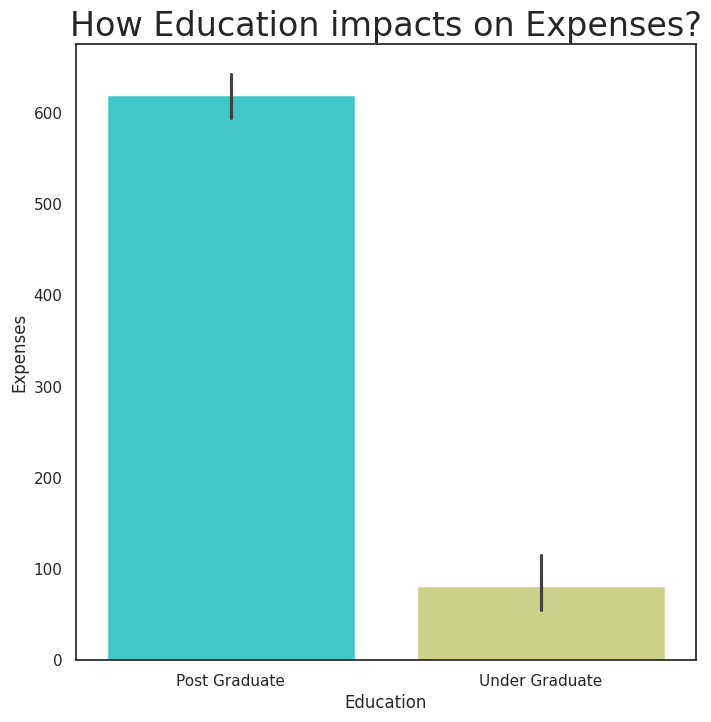

In [97]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Education impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Education", y="Expenses", data=data,palette="rainbow")

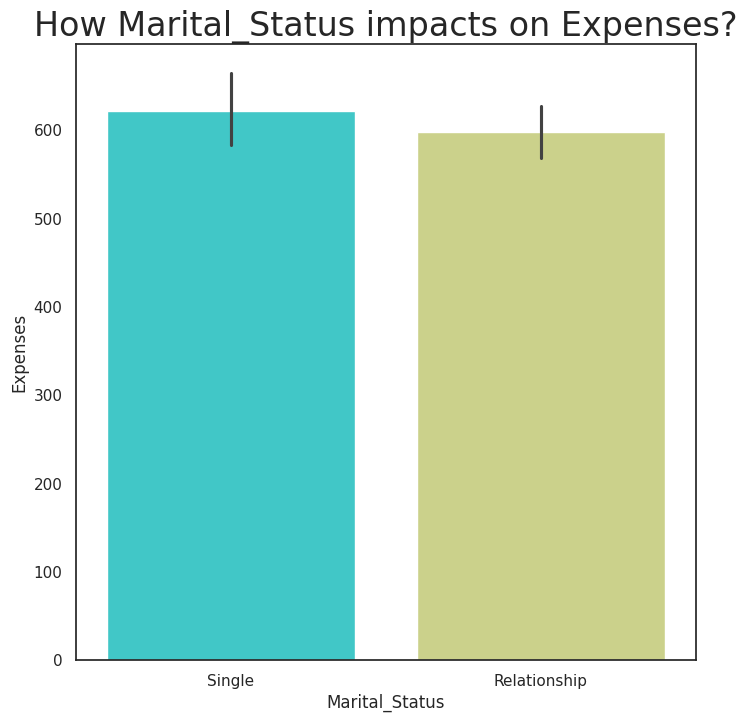

In [98]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Marital_Status impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Expenses", data=data,palette="rainbow")

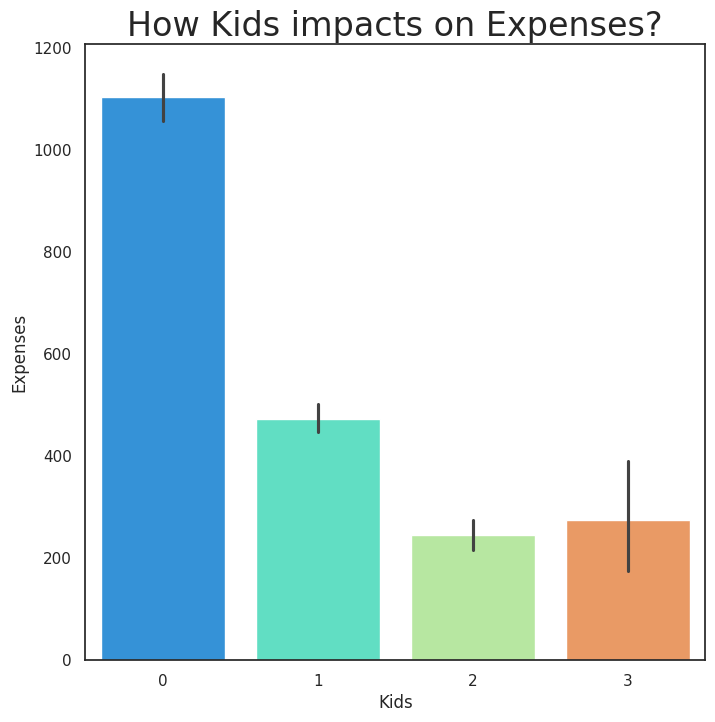

In [99]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Kids impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Kids", y="Expenses", data=data,palette="rainbow")

In [100]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Expenses', 'TotalAcceptedCmp',
       'NumTotalPurchases', 'Customer_Age', 'Customer_For'],
      dtype='object')

In [101]:
data = data[data['Customer_Age'] < 90]
data = data[data['Income'] < 300000]

In [102]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()


data['Education'] = label_encoder.fit_transform(data['Education'])
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_scale = ['Income', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Customer_Age', 'Customer_For']

data[col_scale] = scaler.fit_transform(data[col_scale])

In [104]:
X_0 = data.copy()

In [105]:
from sklearn.cluster import KMeans

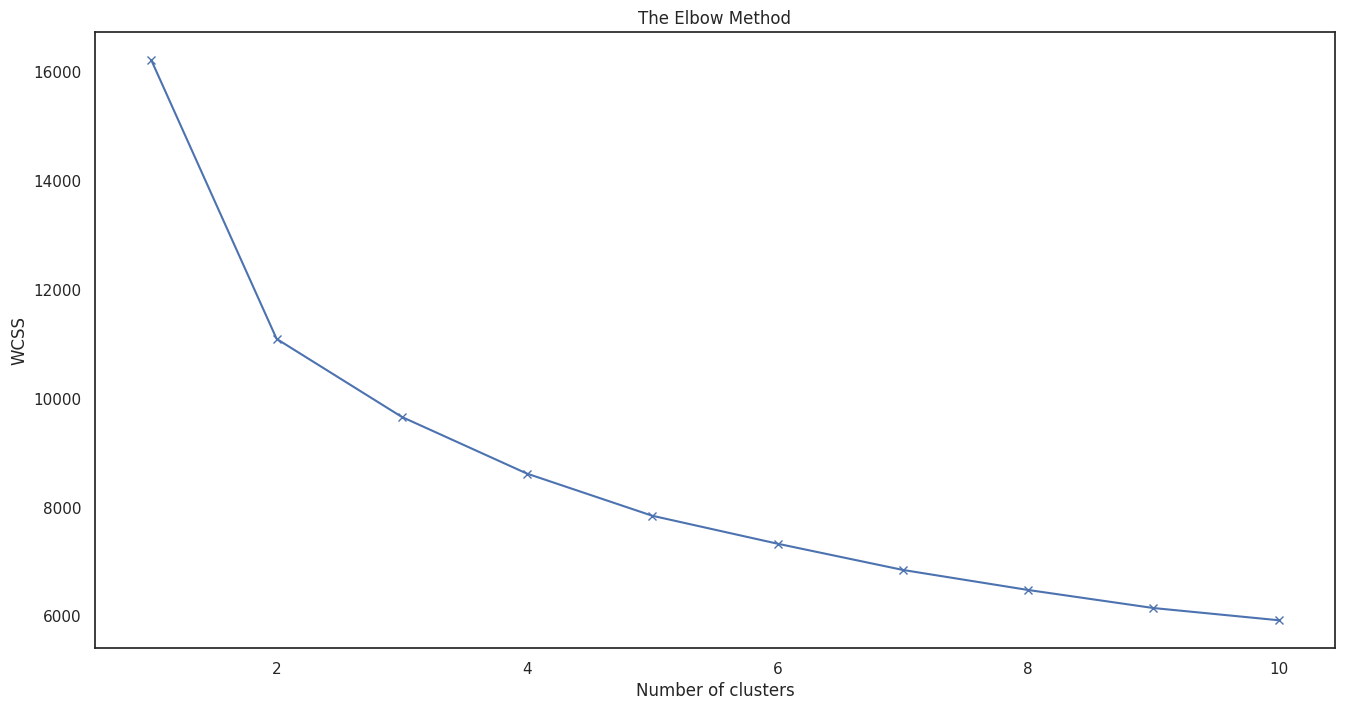

In [106]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_0)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [107]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=2, random_state=42).fit(X_0)
pred=kmeans.predict(X_0)


# Appending those cluster value into main dataframe (without standard-scalar)

X_0['cluster_Kmeans'] = pred + 1

In [108]:
X_0.head()

Education  Marital_Status    Income      Kids  Expenses  TotalAcceptedCmp  NumTotalPurchases  Customer_Age  Customer_For  cluster_Kmeans
0          0               1  0.288947 -1.264308  1.680176          0.620456           1.319340      1.016868      1.529793               1
1          0               1 -0.262003  1.395139 -0.962202         -0.501987          -1.155857      1.273264     -1.191143               2
2          0               0  0.918423 -1.264308  0.282541         -0.501987           0.798246      0.333146     -0.206659               1
3          0               0 -1.182183  0.065416 -0.918994         -0.501987          -0.895310     -1.290693     -1.062517               2
4          0               0  0.296187  0.065416 -0.305762         -0.501987           0.537699     -1.034298     -0.953679               2

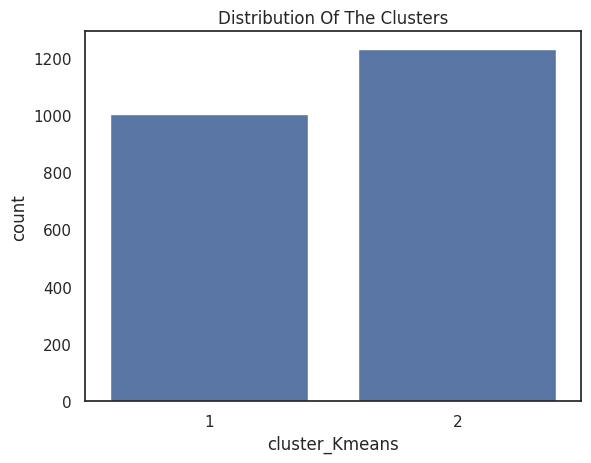

In [109]:
sns.countplot(x=X_0["cluster_Kmeans"])
plt.title("Distribution Of The Clusters")
plt.show()

In [110]:
X_1 = data.copy()

In [111]:
X_1.head()

Education  Marital_Status    Income      Kids  Expenses  TotalAcceptedCmp  NumTotalPurchases  Customer_Age  Customer_For
0          0               1  0.288947 -1.264308  1.680176          0.620456           1.319340      1.016868      1.529793
1          0               1 -0.262003  1.395139 -0.962202         -0.501987          -1.155857      1.273264     -1.191143
2          0               0  0.918423 -1.264308  0.282541         -0.501987           0.798246      0.333146     -0.206659
3          0               0 -1.182183  0.065416 -0.918994         -0.501987          -0.895310     -1.290693     -1.062517
4          0               0  0.296187  0.065416 -0.305762         -0.501987           0.537699     -1.034298     -0.953679

In [112]:
from sklearn.decomposition import PCA
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(X_1)
PCA_ds = pd.DataFrame(pca.transform(X_1), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%       max
col1  2236.0  2.701079e-17  1.727430 -2.822194 -1.606171 -0.260624  1.382975  5.644928
col2  2236.0 -2.859966e-17  1.066494 -3.072538 -0.816210 -0.033549  0.755918  3.240969
col3  2236.0 -2.383305e-17  1.016365 -2.304529 -0.844972  0.002780  0.856409  2.381579

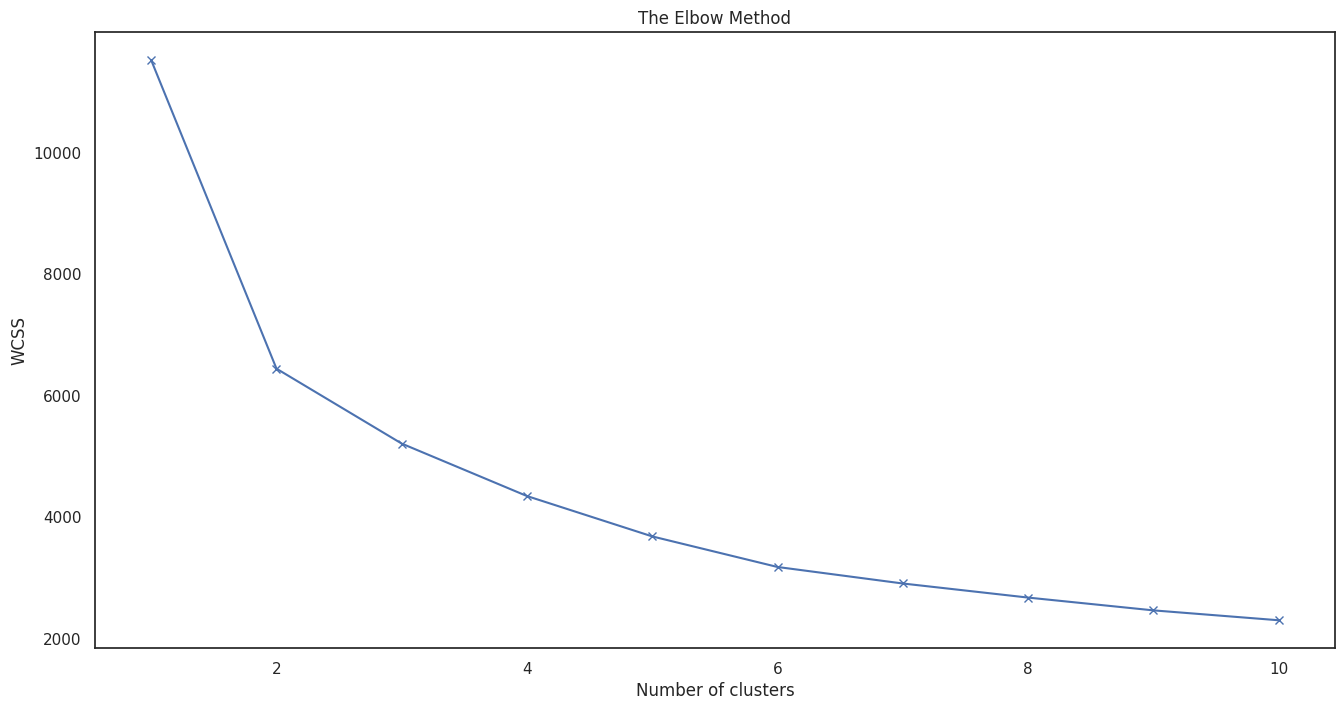

In [113]:

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

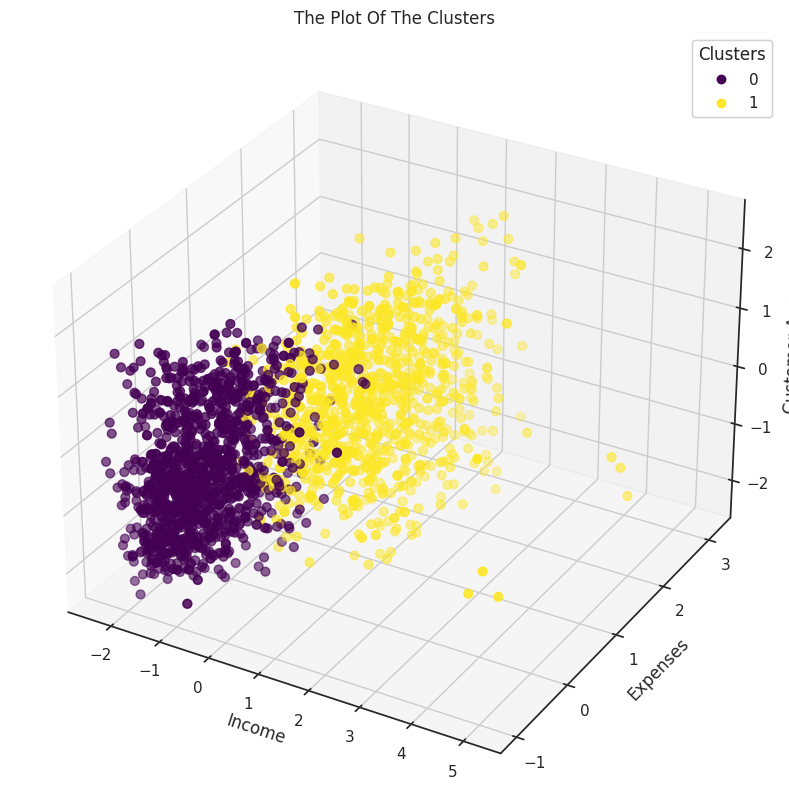

In [125]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Taking X_0 and PCA_ds that are properly defined previously

x = X_0['Income']
y = X_0['Expenses']
z = X_0['Customer_Age']
clusters = PCA_ds["Clusters"]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot
scatter = ax.scatter(x, y, z, s=40, c=clusters, marker='o', cmap='viridis')

# Labeling
ax.set_xlabel('Income')
ax.set_ylabel('Expenses')
ax.set_zlabel('Customer Age')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Title
ax.set_title("The Plot Of The Clusters")

plt.show()


In [114]:
from sklearn.cluster import AgglomerativeClustering

#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=2)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
X_1["Cluster_Agglo"]= yhat_AC + 1

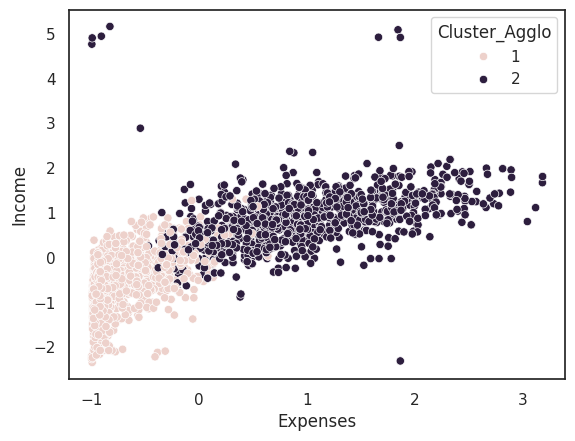

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use keyword arguments and the data parameter
sns.scatterplot(x='Expenses', y='Income', hue='Cluster_Agglo', data=X_1)

# Show the plot
plt.show()


<Axes: xlabel='Marital_Status', ylabel='Income'>

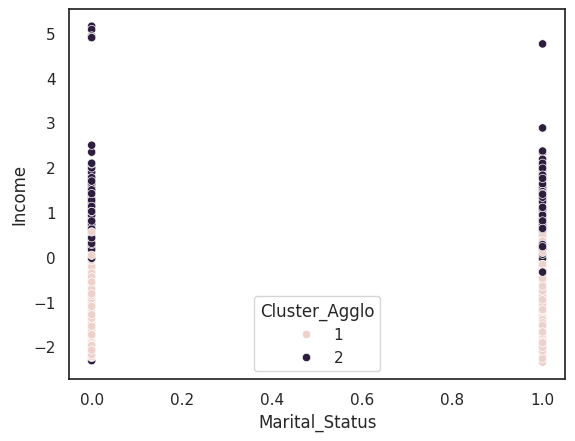

In [116]:
sns.scatterplot(x='Marital_Status', y='Income', hue='Cluster_Agglo', data=X_1)


<Axes: xlabel='Income', ylabel='Customer_Age'>

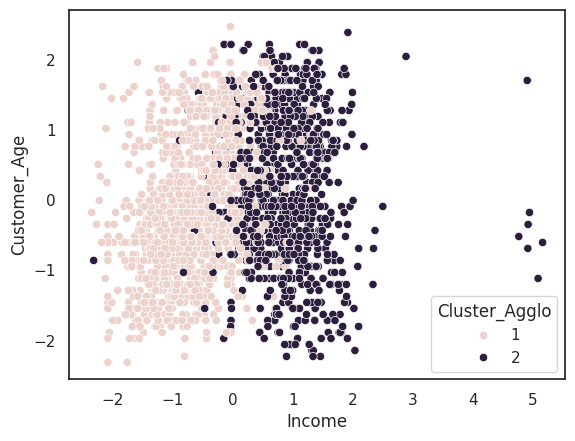

In [117]:
sns.scatterplot(x='Income', y='Customer_Age', hue='Cluster_Agglo', data=X_1)


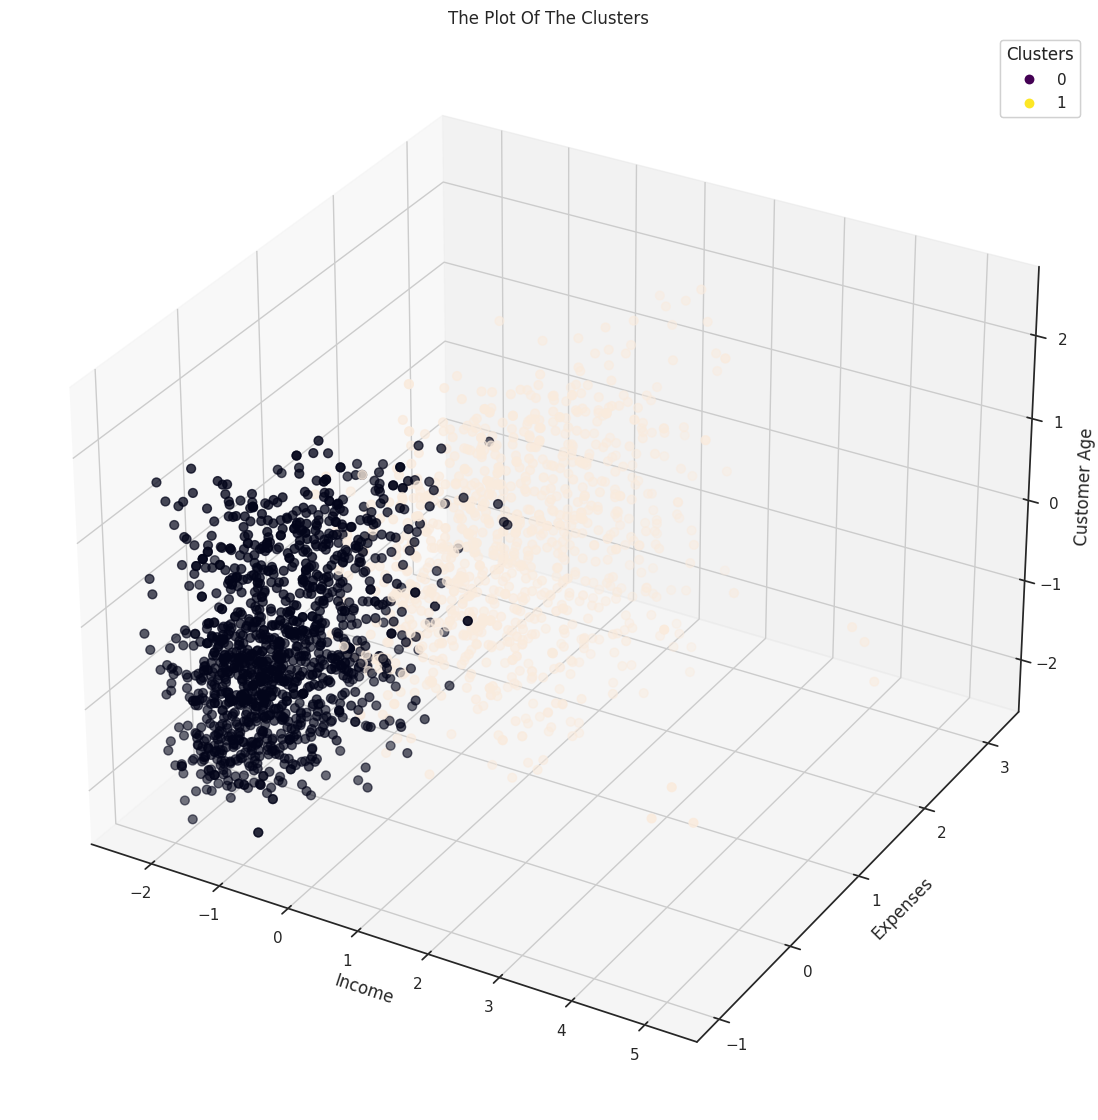

In [127]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = X_1['Income']
y = X_1['Expenses']
z = X_1['Customer_Age']
fig = plt.figure(figsize=(16, 14))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
# Labeling
ax.set_xlabel('Income')
ax.set_ylabel('Expenses')
ax.set_zlabel('Customer Age')
# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
# Title
ax.set_title("The Plot Of The Clusters")
plt.show()





#Conclusion

### Cluster 1:
People with less expenses

people who are married and parents of more than 3 kids

people which low income


-------------------------------------------------------------------------
-------------------------------------------------------------------------

### Cluster 2:
people with more expenses

people who are single or parents who have less than 3 kids

people with high income

Age is not the criteria but it is observed to some extent that people who are older fall in this group
